# Data Collection 

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1WkCyl3kFta2GwV2ZJes0ZNNFNbfBl1LE'

# YD_dataset 1WkCyl3kFta2GwV2ZJes0ZNNFNbfBl1LE
# Yawn_dataset 1LE3BHEpRuIDe-yedGriGg1Ix6_ZliEsp
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('yawn_dataset.zip')

In [2]:
!unzip yawn_dataset.zip

Archive:  yawn_dataset.zip
   creating: YD_dataset/test/
   creating: YD_dataset/test/no_yawn/
  inflating: YD_dataset/test/no_yawn/1004.jpg  
  inflating: YD_dataset/test/no_yawn/1007.jpg  
  inflating: YD_dataset/test/no_yawn/1010.jpg  
  inflating: YD_dataset/test/no_yawn/1033.jpg  
  inflating: YD_dataset/test/no_yawn/1044.jpg  
  inflating: YD_dataset/test/no_yawn/1050.jpg  
  inflating: YD_dataset/test/no_yawn/1063.jpg  
  inflating: YD_dataset/test/no_yawn/1067.jpg  
  inflating: YD_dataset/test/no_yawn/1096.jpg  
  inflating: YD_dataset/test/no_yawn/1114.jpg  
  inflating: YD_dataset/test/no_yawn/1118.jpg  
  inflating: YD_dataset/test/no_yawn/1129.jpg  
  inflating: YD_dataset/test/no_yawn/113.jpg  
  inflating: YD_dataset/test/no_yawn/1134.jpg  
  inflating: YD_dataset/test/no_yawn/115.jpg  
  inflating: YD_dataset/test/no_yawn/1213.jpg  
  inflating: YD_dataset/test/no_yawn/1267.jpg  
  inflating: YD_dataset/test/no_yawn/1268.jpg  
  inflating: YD_dataset/test/no_yawn/1323.j

# Data Augmentation

In [3]:
import numpy as  np
import pandas as pd  

train = pd.read_csv('csv_dataset.csv')
train

,image_names,yawn_or_not
0,YD_dataset/train/yawn/1.jpg,1
1,YD_dataset/train/yawn/10.jpg,1
2,YD_dataset/train/yawn/101.jpg,1
3,YD_dataset/train/yawn/103.jpg,1
4,YD_dataset/train/yawn/104.jpg,1
...,...,...
1443,YD_dataset/train/no_yawn/992.jpg,0
1444,YD_dataset/train/no_yawn/993.jpg,0
1445,YD_dataset/train/no_yawn/994.jpg,0
1446,YD_dataset/train/no_yawn/997.jpg,0


In [4]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline




train_img = []
for img_name in train['image_names']:
    # defining the image path
    image_path = '/content/' + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (224,224,3)
    img = resize(img, output_shape=(224,224,3), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

images = np.array(train_img)
images.shape

(1448, 224, 224, 3)

In [5]:
labels = train['yawn_or_not'].values
labels.shape

(1448,)

In [6]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [7]:

from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(images,labels, test_size = 0.148, random_state = 13)

(Xtrain.shape, Ytrain.shape), (Xtest.shape, Ytest.shape)

(((1233, 224, 224, 3), (1233,)), ((215, 224, 224, 3), (215,)))

In [8]:
Ytest_bin = Ytest
Ytest_bin

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [9]:
from keras.utils import to_categorical

Ytrain = to_categorical(Ytrain)
Ytrain

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [10]:
Ytest = to_categorical(Ytest)
Ytest

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [11]:
print(Ytest.shape,Ytest_bin.shape)

(215, 2) (215,)


# Building model architecture

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Dropout(0.3),
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 64)        0

# Model Training

In [13]:
training = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=50,verbose=1)

Epoch 1/50
39/39 [==============================] - 33s 51ms/step - loss: 0.8363 - accuracy: 0.5464 - val_loss: 0.5988 - val_accuracy: 0.6512
Epoch 2/50
39/39 [==============================] - 1s 32ms/step - loss: 0.5469 - accuracy: 0.7089 - val_loss: 0.5402 - val_accuracy: 0.6884
Epoch 3/50
39/39 [==============================] - 1s 32ms/step - loss: 0.5055 - accuracy: 0.7510 - val_loss: 0.4965 - val_accuracy: 0.7349
Epoch 4/50
39/39 [==============================] - 1s 33ms/step - loss: 0.4401 - accuracy: 0.7899 - val_loss: 0.3869 - val_accuracy: 0.8140
Epoch 5/50
39/39 [==============================] - 1s 33ms/step - loss: 0.2946 - accuracy: 0.8665 - val_loss: 0.3071 - val_accuracy: 0.8605
Epoch 6/50
39/39 [==============================] - 1s 32ms/step - loss: 0.2319 - accuracy: 0.9119 - val_loss: 0.3025 - val_accuracy: 0.8837
Epoch 7/50
39/39 [==============================] - 1s 33ms/step - loss: 0.2050 - accuracy: 0.9139 - val_loss: 0.2616 - val_accuracy: 0.9163
Epoch 8/50
3

# Model Evaluation 

In [14]:
result = model.evaluate(Xtest,Ytest,verbose=1)

print("test loss : ",result[0])
print("test acc. :",result[1])

7/7 [==============================] - 0s 13ms/step - loss: 0.1926 - accuracy: 0.9674
test loss :  0.19263765215873718
test acc. : 0.9674418568611145


In [15]:
predictions= model.predict(Xtest,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

7/7 [==============================] - 0s 13ms/step


In [16]:
predictions

array([[9.99999881e-01, 9.63096767e-08],
       [2.25700656e-11, 1.00000000e+00],
       [5.94453885e-18, 1.00000000e+00],
       [1.01000232e-07, 9.99999881e-01],
       [2.16186038e-08, 1.00000000e+00],
       [9.98648465e-01, 1.35153194e-03],
       [9.99981880e-01, 1.80607221e-05],
       [8.67075947e-18, 1.00000000e+00],
       [9.99985933e-01, 1.40452394e-05],
       [1.55227934e-03, 9.98447657e-01],
       [2.77429461e-01, 7.22570539e-01],
       [5.53807058e-06, 9.99994516e-01],
       [1.10918545e-05, 9.99988914e-01],
       [3.76111329e-01, 6.23888731e-01],
       [9.63208377e-01, 3.67915630e-02],
       [5.71801923e-02, 9.42819774e-01],
       [9.99998450e-01, 1.56442536e-06],
       [6.41959552e-09, 1.00000000e+00],
       [9.99996662e-01, 3.35017421e-06],
       [2.66777680e-18, 1.00000000e+00],
       [1.15188394e-16, 1.00000000e+00],
       [9.99455035e-01, 5.44926384e-04],
       [3.28054815e-03, 9.96719420e-01],
       [2.69133299e-10, 1.00000000e+00],
       [2.946108

In [17]:
predicted_classes

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(accuracy_score(Ytest_bin,predicted_classes))

0.9674418604651163


In [19]:
print(confusion_matrix(Ytest_bin,predicted_classes))

[[100   2]
 [  5 108]]


In [20]:
print(classification_report(Ytest_bin,predicted_classes,target_names=["yawn","no_yawn"]))

              precision    recall  f1-score   support

        yawn       0.95      0.98      0.97       102
     no_yawn       0.98      0.96      0.97       113

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



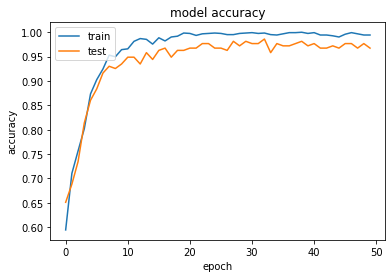

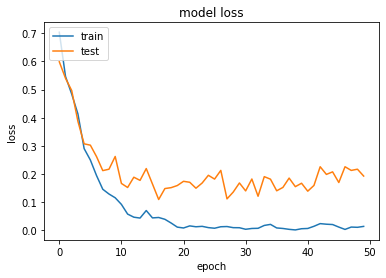

In [21]:
import matplotlib.pyplot as plt

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import roc_curve,roc_auc_score

roc_auc_score(Ytest_bin,predicted_classes)

0.9680721846260629

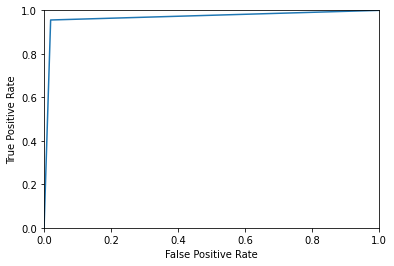

In [23]:
fpr , tpr , thresholds = roc_curve(Ytest_bin,predicted_classes)
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve(fpr,tpr) 

# Saving model 

In [24]:
model.save("Yawn_classifier.model")

INFO:tensorflow:Assets written to: Yawn_classifier.model/assets


In [25]:
!zip -r /content/model.zip /content/Yawn_classifier.model

  adding: content/Yawn_classifier.model/ (stored 0%)
  adding: content/Yawn_classifier.model/variables/ (stored 0%)
  adding: content/Yawn_classifier.model/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: content/Yawn_classifier.model/variables/variables.index (deflated 66%)
  adding: content/Yawn_classifier.model/saved_model.pb (deflated 88%)
  adding: content/Yawn_classifier.model/assets/ (stored 0%)


In [26]:
"""
!wget http://skulddata.cs.umass.edu/traces/mmsys/2014/user06.tar
!tar -xvf /content/user06.tar
!pip install patool
!pip install unrar
import patoolib
patoolib.extract_archive("/content/user06/YawDD dataset.rar", outdir="/content/")
"""

'\n!wget http://skulddata.cs.umass.edu/traces/mmsys/2014/user06.tar\n!tar -xvf /content/user06.tar\n!pip install patool\n!pip install unrar\nimport patoolib\npatoolib.extract_archive("/content/user06/YawDD dataset.rar", outdir="/content/")\n'